In [1]:
import scipy.io as sio
mat_contents = sio.loadmat('C:/Users/OSlab-local-admin/Documents/MAT files/FLIRMATData/Rec-ID07-000025_3.mat')


In [2]:
mat_contents

{'Frame': array([[23.8914814 , 23.78483582, 23.9066906 , ..., 24.44986153,
         24.31485558, 24.1415863 ],
        [23.84581566, 23.89908791, 23.85343361, ..., 24.39742279,
         24.21702576, 24.07355499],
        [23.86865425, 23.8914814 , 23.91429138, ..., 24.25468445,
         24.13403702, 24.0508461 ],
        ...,
        [23.60892296, 23.5552063 , 23.53984451, ..., 28.66647911,
         28.58654785, 28.61987495],
        [23.6165905 , 23.60125542, 23.67786217, ..., 28.81256294,
         28.71966934, 28.68643379],
        [23.5552063 , 23.57823753, 23.53984451, ..., 28.83905983,
         28.84568024, 28.79930687]]),
 'File_DateTime': array([[2018.   ,    7.   ,   31.   ,   15.   ,   59.   ,   29.   ,
          920.634]]),
 'File_ObjectParam': array([[  0.92000002,   1.        , 293.1499939 , 293.1499939 ,
           0.30000001,   0.97456479,   0.        , 293.1499939 ,
           1.        ]])}

In [3]:
fd= mat_contents['Frame']

In [4]:
type(fd)

numpy.ndarray

In [5]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

arr = np.array(fd)
print(arr)
print(arr.shape)

[[23.8914814  23.78483582 23.9066906  ... 24.44986153 24.31485558
  24.1415863 ]
 [23.84581566 23.89908791 23.85343361 ... 24.39742279 24.21702576
  24.07355499]
 [23.86865425 23.8914814  23.91429138 ... 24.25468445 24.13403702
  24.0508461 ]
 ...
 [23.60892296 23.5552063  23.53984451 ... 28.66647911 28.58654785
  28.61987495]
 [23.6165905  23.60125542 23.67786217 ... 28.81256294 28.71966934
  28.68643379]
 [23.5552063  23.57823753 23.53984451 ... 28.83905983 28.84568024
  28.79930687]]
(512, 640)


In [ ]:
#cv2.imshow("hello", arr)
#cv2.waitKey(0)


In [6]:
print(arr[0].size)
print(arr[0][0])
print(arr[0][639])
x = arr[0].flatten()
#print(x)
print(np.amin(x))
print(np.amax(x))

640
23.891481399536133
24.141586303710938
23.784835815429688
33.46291732788086


In [7]:
norm_image = cv2.normalize(arr, None, alpha =np.amin(arr), beta=np.amax(arr), norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
minval = np.amin(arr)
maxval = np.amax(arr)
print(np.amin(arr))
print(np.amax(arr))
norm_image = (arr - minval)/(maxval-minval)
print(norm_image)


23.447528839111328
35.42744064331055
[[0.03705808 0.02815605 0.03832764 ... 0.08366779 0.07239842 0.05793511]
 [0.03324622 0.03769302 0.03388212 ... 0.07929056 0.06423227 0.05225632]
 [0.03515263 0.03705808 0.0389621  ... 0.06737576 0.05730494 0.05036074]
 ...
 [0.01347206 0.00898817 0.00770587 ... 0.43564179 0.42896969 0.4317516 ]
 [0.0141121  0.01283203 0.01922663 ... 0.44783586 0.44008175 0.43730747]
 [0.00898817 0.01091066 0.00770587 ... 0.45004764 0.45060026 0.44672933]]


In [8]:
cv2.imshow("normed", norm_image)
print(norm_image)
cv2.waitKey(0)

[[0.03705808 0.02815605 0.03832764 ... 0.08366779 0.07239842 0.05793511]
 [0.03324622 0.03769302 0.03388212 ... 0.07929056 0.06423227 0.05225632]
 [0.03515263 0.03705808 0.0389621  ... 0.06737576 0.05730494 0.05036074]
 ...
 [0.01347206 0.00898817 0.00770587 ... 0.43564179 0.42896969 0.4317516 ]
 [0.0141121  0.01283203 0.01922663 ... 0.44783586 0.44008175 0.43730747]
 [0.00898817 0.01091066 0.00770587 ... 0.45004764 0.45060026 0.44672933]]


13

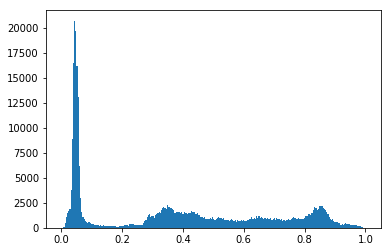

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.hist(norm_image.ravel(),256,[0,1]); plt.show()
#hist = cv2.calcHist([norm_image],[0],None,[256],[0,256])

In [10]:
import os
os.getcwd()

'C:\\Users\\OSlab-local-admin\\PythonCode'

In [11]:
rows,cols = norm_image.shape

M = cv2.getRotationMatrix2D( (cols/2, rows/2 ),270,1)

dst = cv2.warpAffine(norm_image,M,(cols,rows))

In [12]:
cv2.imshow("img", dst)
print(dst)
cv2.waitKey(0)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


13

In [16]:
print(type(dst))


<class 'numpy.ndarray'>


In [15]:
d = [int(x) for x in "1 2 3 4 5".split()]
print(d)
print( type(d))

[1, 2, 3, 4, 5]
<class 'list'>
